In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings("ignore")

In [2]:
cancer = load_breast_cancer()

In [3]:
df_cancer = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_cancer['target'] = cancer['target']
df_cancer['target_label'] = df_cancer['target'].apply(lambda x: 'malignant' if x == 0 else 'benign')
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df_cancer['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, precision_recall_curve, f1_score, average_precision_score, classification_report

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cancer.iloc[:,:-2], df_cancer['target'], stratify=df_cancer['target'], random_state=41)

# DecisionTree

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

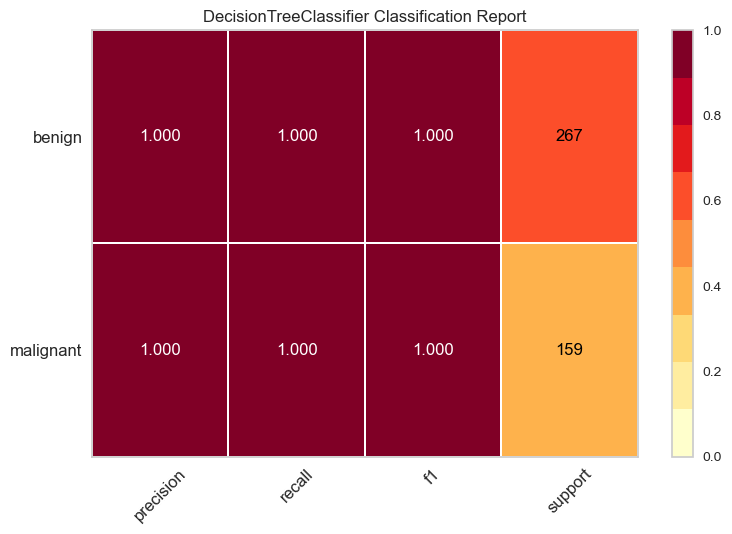

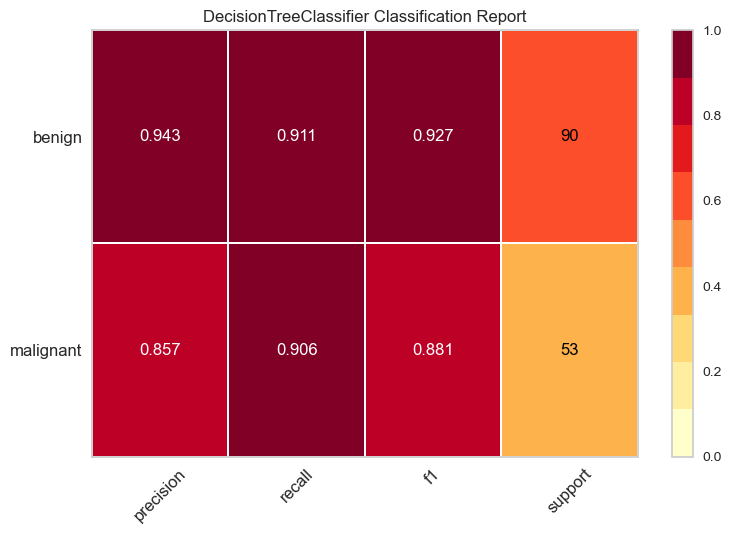

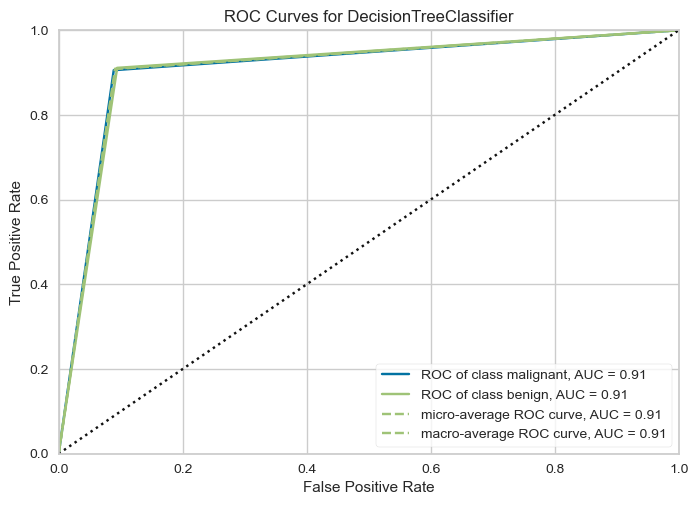

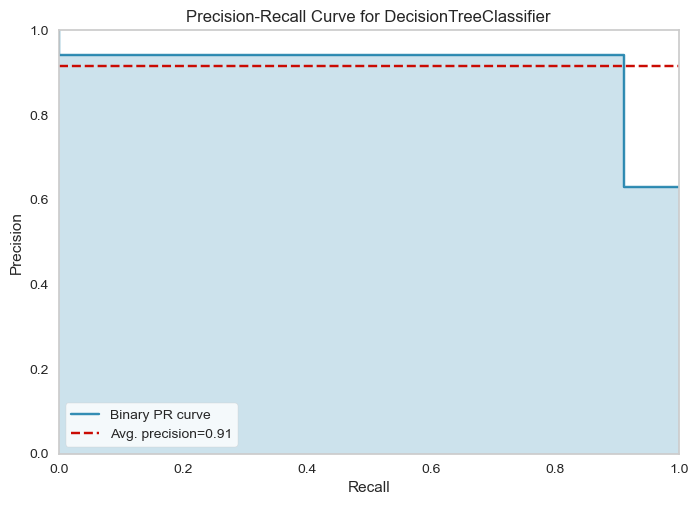

In [9]:
from yellowbrick.classifier import ClassificationReport, ROCAUC, PrecisionRecallCurve

visualizer_train = ClassificationReport(clf, classes=cancer.target_names, support=True)
visualizer_train.fit(X_train, y_train)
visualizer_train.score(X_train, y_train)
visualizer_train.poof()

visualizer_test = ClassificationReport(clf, classes=cancer.target_names, support=True)
visualizer_test.fit(X_test, y_test)
visualizer_test.score(X_test, y_test)
visualizer_test.poof();

roc_auc_visualizer = ROCAUC(clf, classes=cancer['target_names'])
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()

pr_auc_visualizer = PrecisionRecallCurve(clf, classes=cancer['target_names'])
pr_auc_visualizer.fit(X_train, y_train)
pr_auc_visualizer.score(X_test, y_test)
pr_auc_visualizer.show();

# RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf_rn = RandomForestClassifier()
clf_rn.fit(X_train, y_train)

RandomForestClassifier()

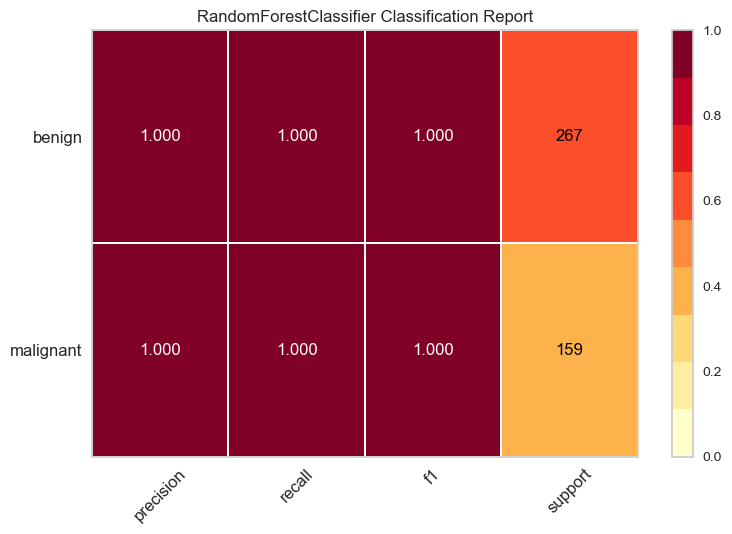

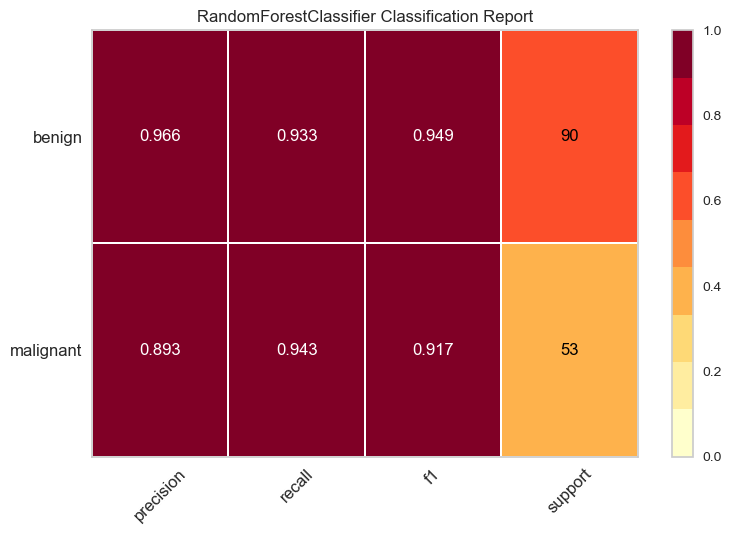

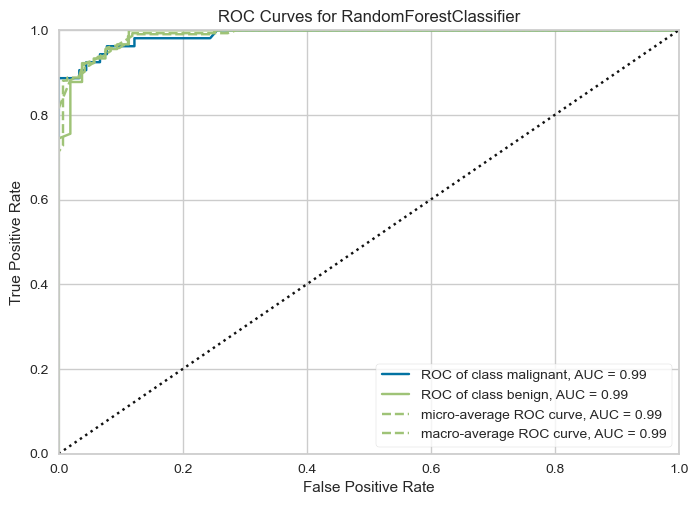

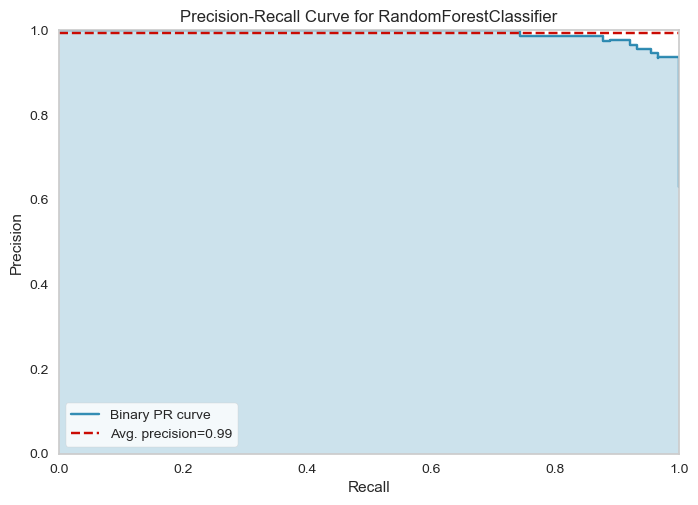

In [11]:
visualizer_train = ClassificationReport(clf_rn, classes=cancer.target_names, support=True)
visualizer_train.fit(X_train, y_train)
visualizer_train.score(X_train, y_train)
visualizer_train.poof()

visualizer_test = ClassificationReport(clf_rn, classes=cancer.target_names, support=True)
visualizer_test.fit(X_test, y_test)
visualizer_test.score(X_test, y_test)
visualizer_test.poof();

roc_auc_visualizer = ROCAUC(clf_rn, classes=cancer['target_names'])
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()

pr_auc_visualizer = PrecisionRecallCurve(clf_rn, classes=cancer['target_names'])
pr_auc_visualizer.fit(X_train, y_train)
pr_auc_visualizer.score(X_test, y_test)
pr_auc_visualizer.show();

# Gradient Boosting Decision Trees (GBDT)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier()

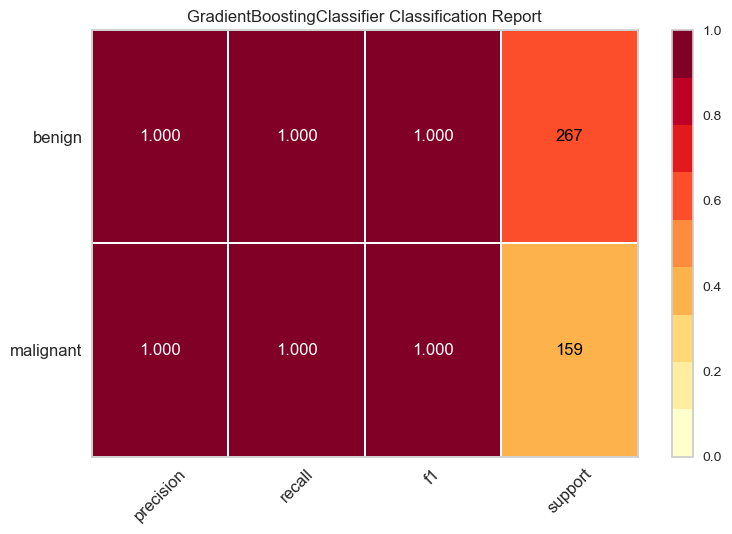

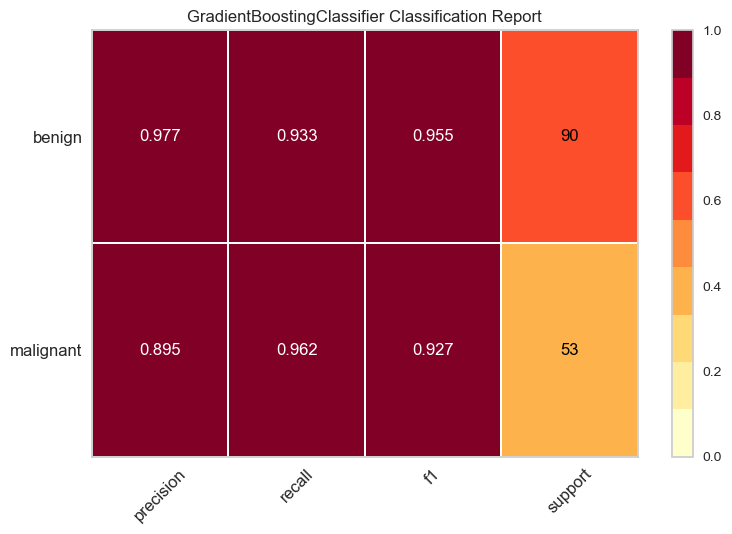

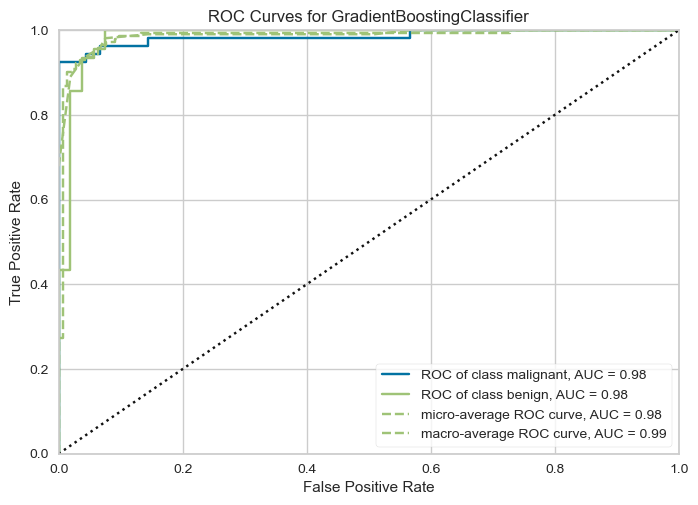

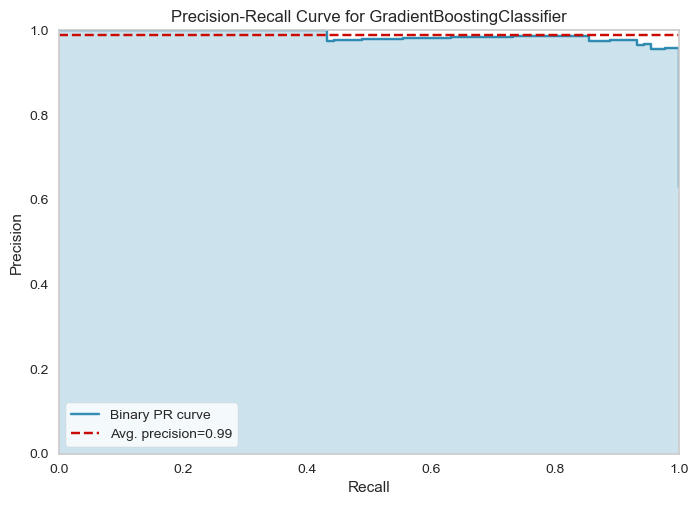

In [13]:
visualizer_train = ClassificationReport(clf_gb, classes=cancer.target_names, support=True)
visualizer_train.fit(X_train, y_train)
visualizer_train.score(X_train, y_train)
visualizer_train.poof()

visualizer_test = ClassificationReport(clf_gb, classes=cancer.target_names, support=True)
visualizer_test.fit(X_test, y_test)
visualizer_test.score(X_test, y_test)
visualizer_test.poof();

roc_auc_visualizer = ROCAUC(clf_gb, classes=cancer['target_names'])
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()

pr_auc_visualizer = PrecisionRecallCurve(clf_gb, classes=cancer['target_names'])
pr_auc_visualizer.fit(X_train, y_train)
pr_auc_visualizer.score(X_test, y_test)
pr_auc_visualizer.show();

# XGboost

In [14]:
import xgboost as xgb
from xgboost import XGBClassifier

clf_x = XGBClassifier()
clf_x.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

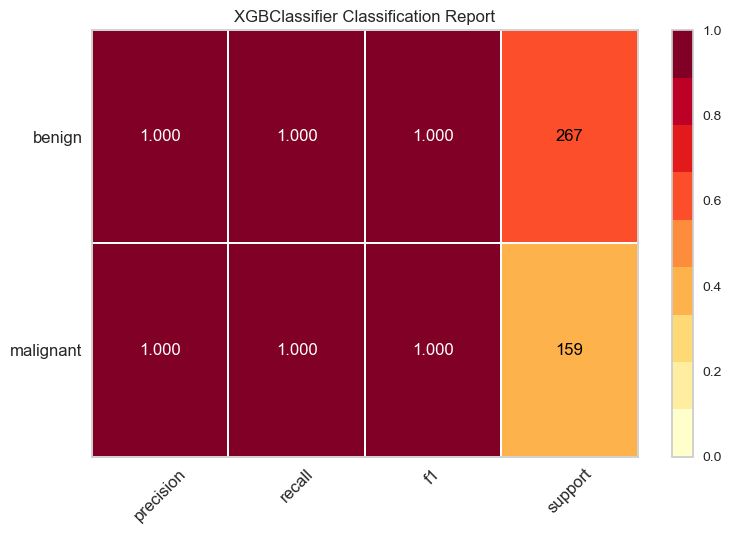

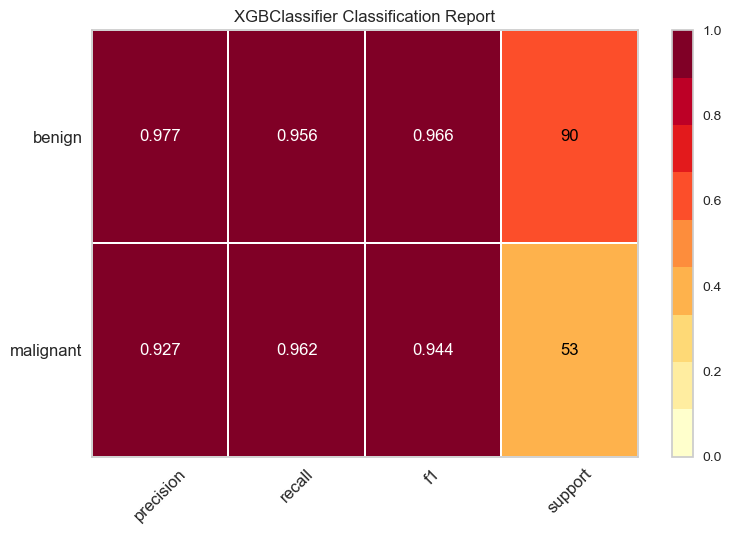

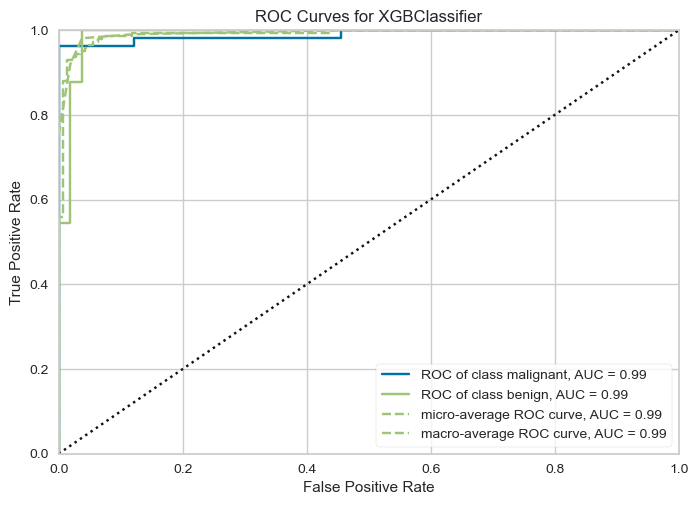

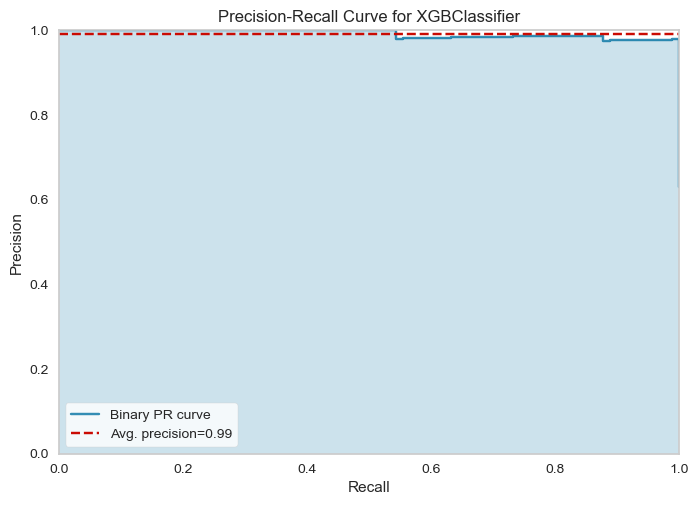

In [15]:
visualizer_train = ClassificationReport(clf_x, classes=cancer.target_names, support=True)
visualizer_train.fit(X_train, y_train)
visualizer_train.score(X_train, y_train)
visualizer_train.poof()

visualizer_test = ClassificationReport(clf_x, classes=cancer.target_names, support=True)
visualizer_test.fit(X_test, y_test)
visualizer_test.score(X_test, y_test)
visualizer_test.poof();

roc_auc_visualizer = ROCAUC(clf_x, classes=cancer['target_names'])
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()

pr_auc_visualizer = PrecisionRecallCurve(clf_x, classes=cancer['target_names'])
pr_auc_visualizer.fit(X_train, y_train)
pr_auc_visualizer.score(X_test, y_test)
pr_auc_visualizer.show();

In [16]:
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK

space={'max_depth': hp.choice('max_depth', np.arange(5, 15, dtype=int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 800, 10)),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'seed': 41
    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric=["auc", "aucpr", "logloss"],
            early_stopping_rounds=10, verbose=False)
    

    pred = clf.predict(X_test)
    auc = roc_auc_score(y_test, pred)
    aucpr = average_precision_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    result = {
        'loss': -accuracy,
        'auc': auc,
        'aucpr': aucpr,
        'hyperparameters': space,
        'status': STATUS_OK
    }
    return result

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 1000,
                        trials = trials)

100%|█████| 1000/1000 [01:23<00:00, 11.95trial/s, best loss: -0.958041958041958]


In [17]:
all_results = trials.results
all_hyperparameters = [result['hyperparameters'] for result in all_results]
all_loss = [result['loss'] for result in all_results]
all_auc = [result['auc'] for result in all_results]
all_prauc = [result['aucpr'] for result in all_results]

In [18]:
hyperparam = pd.DataFrame(all_hyperparameters)
metrics = pd.DataFrame([all_loss, all_auc, all_prauc]).T
metrics.columns = ['loss', 'auc', 'prauc']
df_result = pd.concat([hyperparam, metrics], axis=1)
df_result

,colsample_bytree,gamma,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,seed,loss,auc,prauc
0,0.831929,1.655629,6,6.0,370,71.0,0.008166,41,-0.860140,0.811321,0.818182
1,0.589513,5.448911,11,8.0,350,160.0,0.714054,41,-0.370629,0.500000,0.629371
2,0.825439,5.947363,14,6.0,610,96.0,0.382622,41,-0.370629,0.500000,0.629371
3,0.745406,3.046734,11,8.0,130,42.0,0.522915,41,-0.930070,0.932809,0.939003
4,0.873102,6.540258,10,9.0,530,158.0,0.763717,41,-0.370629,0.500000,0.629371
...,...,...,...,...,...,...,...,...,...,...,...
995,0.742445,1.533523,5,2.0,250,40.0,0.776066,41,-0.951049,0.945597,0.945155
996,0.763249,2.002916,5,3.0,540,138.0,0.672437,41,-0.370629,0.500000,0.629371
997,0.862073,2.891820,12,1.0,690,42.0,0.973830,41,-0.930070,0.932809,0.939003
998,0.802988,2.233327,9,2.0,90,47.0,0.686154,41,-0.944056,0.936164,0.935109


In [19]:
best_metrics = trials.best_trial['result']
best_auc = best_metrics['auc']
best_prauc = best_metrics['aucpr']
best_loss = best_metrics['loss']
best = pd.DataFrame([best_hyperparams])
best['loss'] = best_loss
best['auc'] = best_auc
best['auc_pr'] = best_prauc
best = best.T
best.columns = ['parameters']
best

,parameters
colsample_bytree,0.818759
gamma,1.002358
max_depth,6.000000
min_child_weight,8.000000
n_estimators,62.000000
reg_alpha,42.000000
reg_lambda,0.004270
loss,-0.958042
auc,0.955031
auc_pr,0.955423


In [20]:
best_params = {
    'n_estimators': int(best.loc['n_estimators'].item()),
    'max_depth': int(best.loc['max_depth'].item()),
    'gamma': best.loc['gamma'].item(),
    'reg_alpha': int(best.loc['reg_alpha'].item()),
    'min_child_weight': int(best.loc['min_child_weight'].item()),
    'colsample_bytree': best.loc['colsample_bytree'].item(),
}

clf = xgb.XGBClassifier(**best_params)


In [21]:
evaluation = [( X_train, y_train), ( X_test, y_test)]
    
clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric=["auc", "aucpr", "logloss"],
            early_stopping_rounds=10, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8187587318352446, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.002357988725372, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, n_estimators=62, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [22]:
pd_train = pd.DataFrame(clf.evals_result()['validation_0'])
pd_train.columns = ['auc_train', 'aucpr_train', 'logloss_train']
pd_test = pd.DataFrame(clf.evals_result()['validation_1'])
pd_test.columns = ['auc_test', 'aucpr_test', 'logloss_test']
pd.concat([pd_train, pd_test], axis=1)

,auc_train,aucpr_train,logloss_train,auc_test,aucpr_test,logloss_test
0,0.948602,0.948748,0.580758,0.907966,0.913688,0.586523
1,0.971627,0.975713,0.506757,0.951572,0.969041,0.518945
2,0.976986,0.977911,0.459478,0.966771,0.974506,0.476040
3,0.980437,0.981785,0.426225,0.961950,0.972069,0.448868
4,0.983264,0.985538,0.398952,0.961950,0.972069,0.423978
5,0.985160,0.986736,0.381359,0.965723,0.974232,0.406576
6,0.985478,0.986874,0.369285,0.968029,0.975465,0.395318
7,0.985431,0.986855,0.360465,0.968658,0.975781,0.386545
8,0.985643,0.986984,0.353458,0.968029,0.975465,0.380955
9,0.985643,0.986984,0.353458,0.968029,0.975465,0.380955


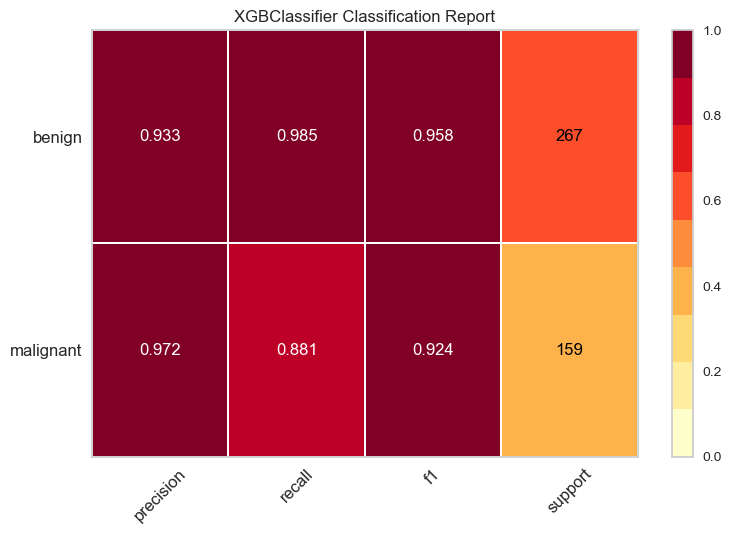

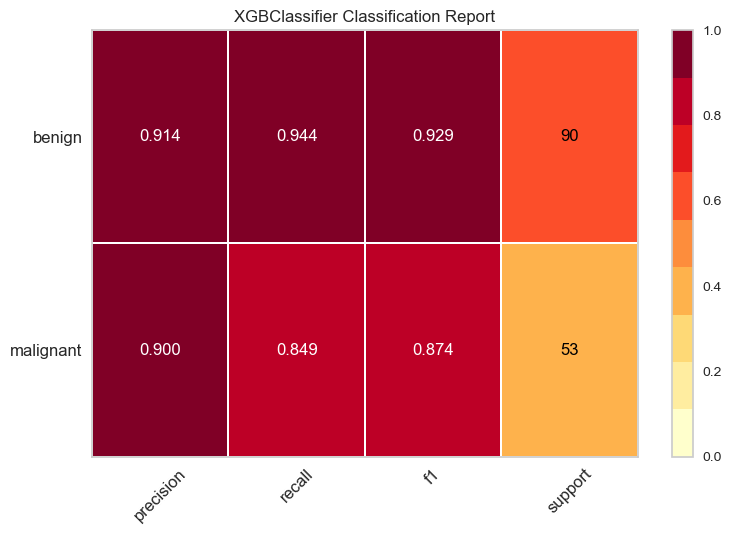

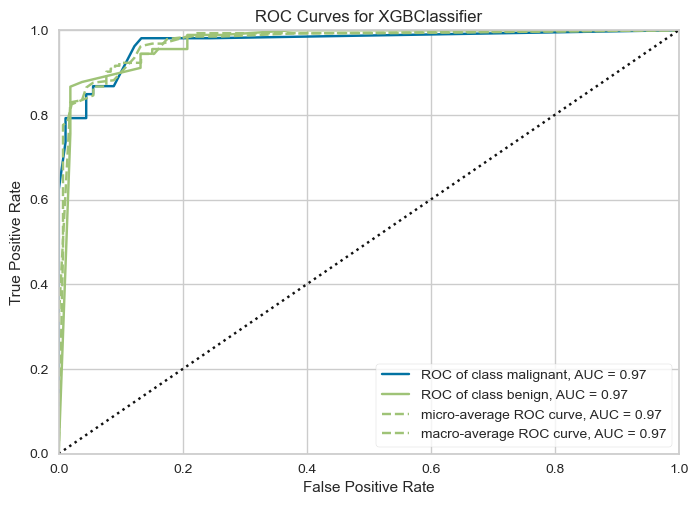

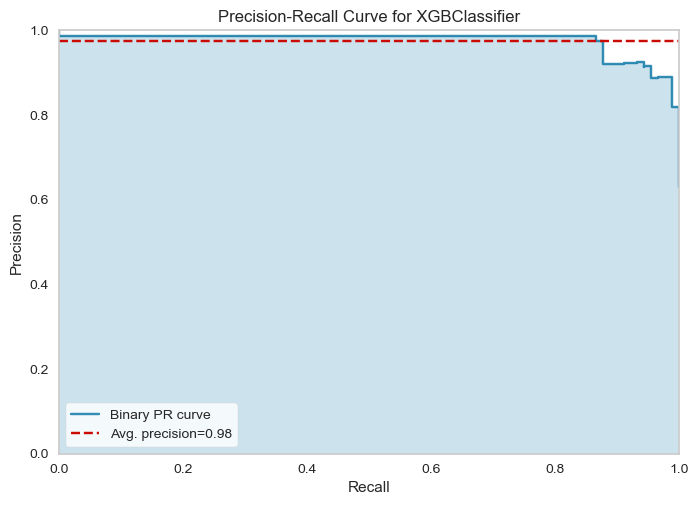

In [23]:
visualizer_train = ClassificationReport(clf, classes=cancer.target_names, support=True)
visualizer_train.fit(X_train, y_train)
visualizer_train.score(X_train, y_train)
visualizer_train.poof()

visualizer_test = ClassificationReport(clf, classes=cancer.target_names, support=True)
visualizer_test.fit(X_test, y_test)
visualizer_test.score(X_test, y_test)
visualizer_test.poof();

roc_auc_visualizer = ROCAUC(clf, classes=cancer['target_names'])
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()

pr_auc_visualizer = PrecisionRecallCurve(clf, classes=cancer['target_names'])
pr_auc_visualizer.fit(X_train, y_train)
pr_auc_visualizer.score(X_test, y_test)
pr_auc_visualizer.show();

# По факту точність на тесті погіршелась під час налаштування гіперпараметрів, но перевнавчання зменьшилось